In [1]:
import os
from jupyterthemes import jtplot #for making plots appear with same theme
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)

In [2]:

#gpu check

import os
import tensorflow as tf
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
data_dir = "C:\\Users\\kmens\\Desktop\\AI\\Tensorflow Bootcamp\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images"

In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from matplotlib.image import imread 
#allows to read in image files

In [7]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
para_cell = train_path+ 'parasitized\\'+ 'C100P61ThinF_IMG_20150918_144104_cell_162.png'
imread(para_cell) #image data
imread(para_cell).shape #148 by 142 dim

(148, 142, 3)

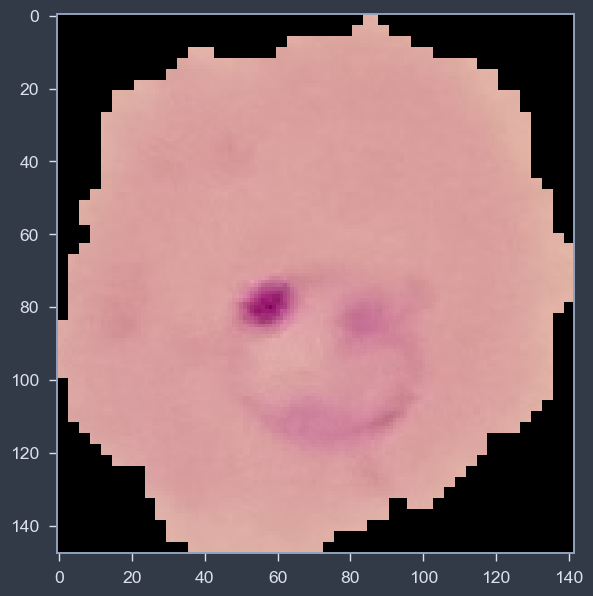

In [11]:
plt.imshow(imread(para_cell))
plt.show()

In [12]:
uninfected_cell = train_path + 'uninfected\\'+'C1_thinF_IMG_20150604_104722_cell_9.png'
plt.imshow(imread(uninfected_cell))

In [13]:
len(os.listdir(train_path+'parasitized'))
# infected data set size

12480

In [14]:
len(os.listdir(train_path+'uninfected'))
#niiice, same data sets

12480

In [15]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,color = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [16]:
sns.jointplot(x=dim1,y=dim2)

In [17]:
image_shape = (130,130,3)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range = 0.1,
                              zoom_range = 0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

ImageDataGenerator()

In [20]:
para_img = imread(para_cell)
plt.imshow(para_img)#data is already normalized

In [21]:
plt.imshow(image_gen.random_transform(para_img))

In [22]:
image_gen.flow_from_directory(train_path)
#flow_from-directory requires that data in directory is organized into subfolders of classes

Found 24958 images belonging to 2 classes.


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout 

In [24]:
#run tests later with padding='same'
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [27]:
batch_size = 16

In [28]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                               target_size=(130,130),
                                               color_mode = 'rgb',
                                               class_mode='binary',
                                               shuffle='True')

Found 24958 images belonging to 2 classes.


In [29]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                               target_size=(130,130),
                                               color_mode = 'rgb',
                                               class_mode='binary',
                                               shuffle=False)
#do not shuffle, else labels will be shuffled from their features 

Found 2600 images belonging to 2 classes.


In [30]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [37]:
results= model.fit_generator(train_image_gen, 
                             epochs = 20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
780/780 [==============================] - 89s 113ms/step - loss: 0.7342 - accuracy: 0.9021 - val_loss: 0.2657 - val_accuracy: 0.9092
Epoch 2/20
780/780 [==============================] - 86s 110ms/step - loss: 0.2479 - accuracy: 0.9220 - val_loss: 0.2370 - val_accuracy: 0.9262
Epoch 3/20
780/780 [==============================] - 85s 109ms/step - loss: 0.2148 - accuracy: 0.9342 - val_loss: 0.1983 - val_accuracy: 0.9331
Epoch 4/20
259/780 [========>.....................] - ETA: 51s - loss: 0.2057 - accuracy: 0.9382

KeyboardInterrupt: 

In [32]:
from tensorflow.keras.models import load_model
model = load_model('malaria_detector.h5')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [38]:
model.history.history

{'loss': [0.7342014312744141, 0.24794811010360718, 0.21484489738941193],
 'accuracy': [0.902075469493866, 0.9220290184020996, 0.9342495203018188],
 'val_loss': [0.26572829484939575, 0.23704122006893158, 0.19831861555576324],
 'val_accuracy': [0.9092307686805725, 0.926153838634491, 0.9330769181251526]}

In [ ]:
model.evaluate_generator(test_image_gen)

In [ ]:
model.metrics_names

In [ ]:
pred = model.predict_generator(test_image_gen)

In [ ]:
predictions = pred > 0.5

In [ ]:
predictions

In [ ]:
len(pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
test_image_gen.classes

In [ ]:
#compare test_image_gen with the predictions
print(classification_report(test_image_gen.classes, predictions))

In [ ]:
confusion_matrix(test_image_gen.classes, predictions)

In [ ]:
para_cell

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
my_image=image.load_img(para_cell, target_size = (130,130,3))

In [ ]:
my_image_arr = image.img_to_array(my_image)

In [ ]:
my_image_arr.shape

In [ ]:
my_image

In [ ]:
my_image_arr=np.expand_dims(my_image_arr, axis=0)
my_image_arr.shape

In [ ]:
model.predict(my_image_arr)

In [ ]:
train_image_gen.class_indices